In [1]:
#!/usr/bin/env python3
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [2]:
customer_churn = pd.read_csv('customer-churn.csv')

names = ["gender", "Partner", "Dependents", "PhoneService", 
"MultipleLines", "InternetService", "OnlineSecurity",
"OnlineBackup", "DeviceProtection", "TechSupport", 
"StreamingMovies", "StreamingTV", "Contract", "PaperlessBilling", 
"PaymentMethod"]

churn = ["Continuing Service", "Churn"]

customer_churn_new = pd.get_dummies(customer_churn, columns=names)
del customer_churn_new['customerID'] 

In [3]:
customer_churn_new["Churn"] = customer_churn_new["Churn"].map({'Yes':1, "No":0})

customer_churn_new["TotalCharges"] = customer_churn_new["TotalCharges"].replace(" ", np.nan)
customer_churn_new["TotalCharges"] = customer_churn_new["TotalCharges"].astype("float64")
customer_churn_new["TotalCharges"].fillna(customer_churn_new["TotalCharges"].mean(), inplace=True)

In [4]:
training_set, test_set = train_test_split(customer_churn_new,
                                          test_size = 0.25,
                                          random_state = 42)

In [5]:
feature_space = training_set.iloc[:, training_set.columns != "Churn"]
feature_class = training_set.iloc[:, training_set.columns == "Churn"]

In [6]:
fit_lr = LogisticRegression(random_state=42)

In [7]:
np.random.seed(42)
start = time.time()

param_dist = {"solver": ["liblinear", "saga"],
              "C": [0.001, 0.01, 0.1, 1]}

cv_gb = GridSearchCV(fit_lr, cv = 10,
                     param_grid=param_dist)

cv_gb.fit(feature_space, feature_class["Churn"])
print('Best Parameters using grid search: \n', 
      cv_gb.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/sta

/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/rxe/myProjects/wip/sta

Best Parameters using grid search: 
 {'C': 0.01, 'solver': 'liblinear'}
Time taken in grid search:  18.20


/home/rxe/myProjects/wip/startup_weekend/venv/lib/python3.5/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [8]:
fit_lr.set_params(penalty="l1", 
                 solver="liblinear", 
                 C=0.1)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
fit_lr.fit(feature_space, feature_class["Churn"])

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pd.DataFrame(list(zip(training_set.columns, fit_lr.coef_.T)), columns = ["Variable", "Coefficient"])

,Variable,Coefficient
0,SeniorCitizen,[0.09945508410049626]
1,tenure,[-0.06267311550554285]
2,MonthlyCharges,[0.002378380856971564]
3,TotalCharges,[0.00034919138875245064]
4,Churn,[0.0]
5,gender_Female,[-0.018727227563198987]
6,gender_Male,[0.0]
7,Partner_No,[0.0]
8,Partner_Yes,[0.0]
9,Dependents_No,[-0.13145605159560017]


In [11]:
n = KFold(n_splits=10)
cross_val_lr = cross_val_score(fit_lr, 
                feature_space, 
                feature_class["Churn"], 
                cv = n,
                verbose=1)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [13]:
for i in range(0, len(cross_val_lr)):
    print("Cross Validation Job {0}: {1: 0.3f}".format(i, cross_val_lr[i]))
print("Cross Validation Average: {0: 0.3f} (+/- {1: 0.3f})".format(cross_val_lr.mean(), cross_val_lr.std() /2))

Cross Validation Job 0:  0.820
Cross Validation Job 1:  0.820
Cross Validation Job 2:  0.790
Cross Validation Job 3:  0.812
Cross Validation Job 4:  0.767
Cross Validation Job 5:  0.824
Cross Validation Job 6:  0.780
Cross Validation Job 7:  0.792
Cross Validation Job 8:  0.801
Cross Validation Job 9:  0.818
Cross Validation Average:  0.803 (+/-  0.009)


In [14]:
def plot_roc_curve(fpr, tpr, auc, mod, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph
    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * mod: 	String represenation of appropriate model, can only contain the
            following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    mod_list = ['lr']
    method = [('Logistic Regression', 'red')]

    plot_title = ''
    color_value = ''
    for i in range(0, len(mod_list)):
        if mod_list[i] == mod:
            plot_title = method[i][0]
            color_value = method[i][1]

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
        color=color_value,
        linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
        .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [15]:
test_set_feat = test_set.iloc[:, test_set.columns != "Churn"]
test_class_set = test_set.iloc[:, test_set.columns == "Churn"]

In [28]:
predictions_prob = fit_lr.predict_proba(test_set_feat)[:, 1]

# ROC Curve stuff
fpr1, tpr1, _ = roc_curve(test_class_set["Churn"],
                          predictions_prob)

auc_lr = auc(fpr1, tpr1)

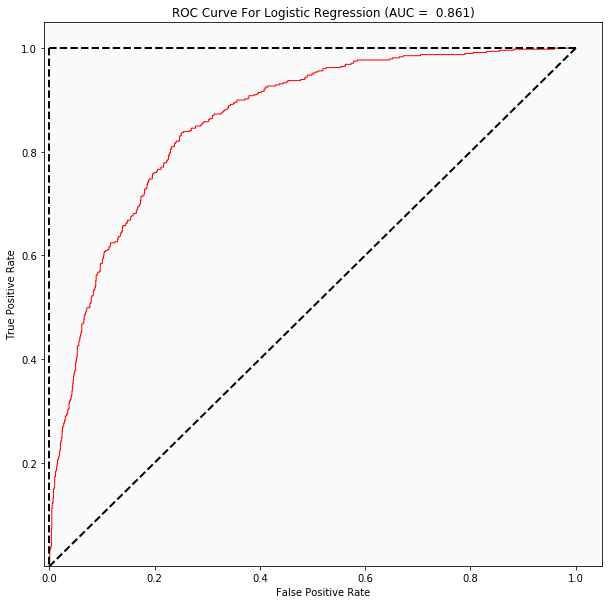

In [29]:
plot_roc_curve(fpr1, tpr1, auc_lr, "lr",
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

In [18]:
predictions_lr = fit_lr.predict(test_set_feat)

In [19]:
print("{0: 0.3f}% test error rate".format((1 - fit_lr.score(test_set_feat, test_class_set["Churn"])) * 100))

 18.569% test error rate


In [20]:
test_crosstb_comp = pd.crosstab(index = test_class_set["Churn"],
                           columns = predictions_lr)

test_crosstb = test_crosstb_comp.as_matrix()

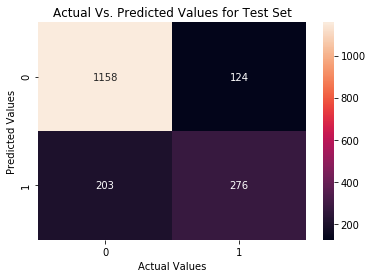

In [21]:
sns.heatmap(test_crosstb_comp,
           annot=True,
           fmt=".0f")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual Vs. Predicted Values for Test Set")
plt.show()

In [27]:
fit_lr.predict_proba(test_set_feat)

array([[0.31424853, 0.68575147],
       [0.94266932, 0.05733068],
       [0.99564746, 0.00435254],
       ...,
       [0.85851739, 0.14148261],
       [0.28993458, 0.71006542],
       [0.80611582, 0.19388418]])

# Compare models

In [36]:
from GradientBoosting import fpr2, tpr2, auc_gb

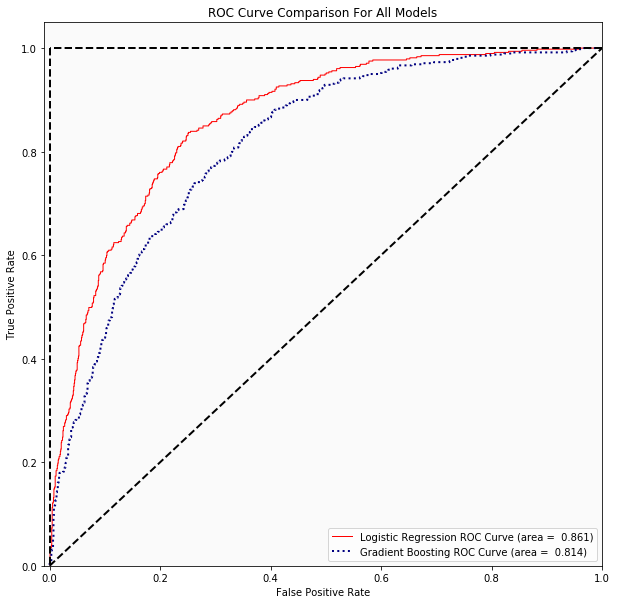

In [38]:
# Plotting ROC Curves
f, ax = plt.subplots(figsize=(10, 10))

plt.plot(fpr1, tpr1, label='Logistic Regression ROC Curve (area = {0: .3f})'\
         .format(auc_lr),
         color = 'red',
         linewidth=1)
plt.plot(fpr2, tpr2,label='Gradient Boosting ROC Curve (area = {0: .3f})'\
         .format(auc_gb),
         color = 'navy',
         linestyle=':',
         linewidth=2)
ax.set_facecolor('#fafafa')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison For All Models')
plt.legend(loc="lower right")
plt.show()